- ## Omega aragonite random experiments

- Read csv  data file

In [36]:
# Import packages
import pandas as pd
import PyCO2SYS as pyco2
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [37]:
# Function to read in csv file
def read_csv(file):
    """
    Read in csv file and return pandas dataframe
    """
    df = pd.read_csv(file, sep=",", header=0,  decimal=".", encoding='utf-8')
    return df

In [38]:
# define file path 
terminos_ta_dic_data_path = "../data/MartinezTrejo_etal_2023_TA_DIC_RawData.csv"

# Read in data
terminos_ta_dic_data = read_csv(terminos_ta_dic_data_path)

# Copy data to new dataframe
terminos_ta_dic = terminos_ta_dic_data.copy()

### Calculate TA vs DIC linear relationship

In [23]:
import numpy as np

def calculate_linear_relationship(x, y):
    # Fit a linear model to the data (x, y)
    coefficients = np.polyfit(x, y, 1)  # Linear fit (polynomial of degree 1)
    slope, intercept = coefficients  # Unpacking the coefficients

    # Function to calculate y based on x using the found linear relationship
    def linear_model(x_new):
        return slope * x_new + intercept

    return linear_model



In [41]:
# Create the TA and DIC data from the linear relationship

x = terminos_ta_dic["TA_micromol_kg"]
y = terminos_ta_dic["DIC_micromol_kg"]

# Create the function using the existing data
linear_function = calculate_linear_relationship(x, y)

# Example data

TA_linear= np.arange(2000, 4000, 0.5)

DIC_linear= linear_function(TA_linear)


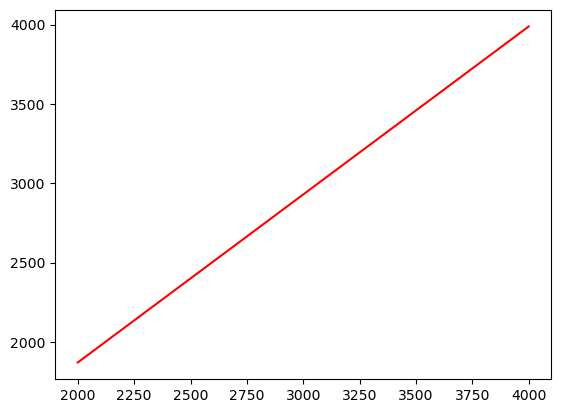

In [42]:
plt.plot(TA_linear, DIC_linear, label="Linear regression model", color="red")

### PyCO2SYS configuration from  TA and DIC linear, using salintiny = 35

In [53]:
# Create dictionary with data configuration for PyCO2SYS. 
linear_co2sys_params_dic_ta_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": DIC_linear,
    # TA measured in the lab, Total scale
    "par2": TA_linear,
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": 35,  # in-situ salinity in PSU, constant for all samples
    # in-situ temperature (output conditions) in °C
    "temperature_out": 25,
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

#### Run PyCO2SYS

In [48]:
# Run PyCO2SYS to calculate the carbonate system parameters
linear_inorganic_carbon_results= pyco2.sys(**linear_co2sys_params_dic_ta_config)


### Plot linear results, constant salinity = 35

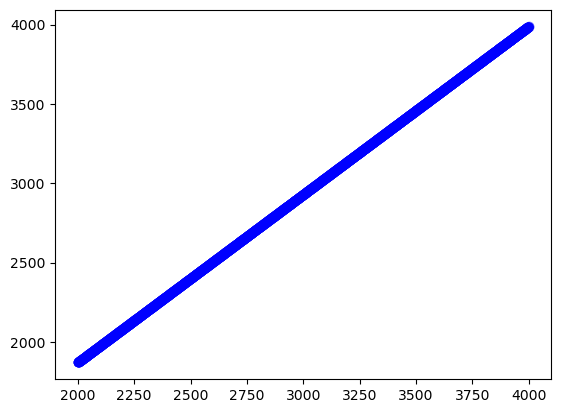

In [49]:
# Plot linear relationship Ta vs DIC, constant temperature and salinity
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(linear_inorganic_carbon_results["alkalinity"], linear_inorganic_carbon_results["dic"], color='blue', alpha=0.5)

plt.show()


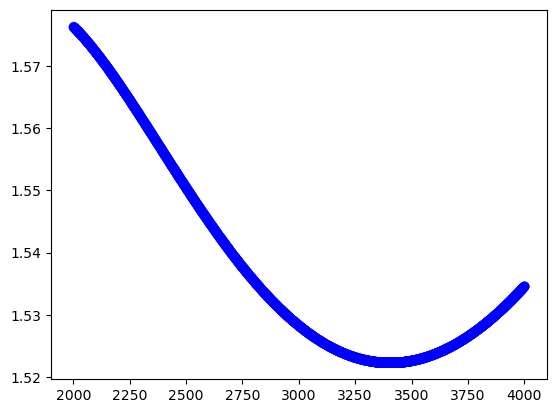

In [54]:
# Plot TA vs saturation_aragonite, constant temperature and salinity
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(linear_inorganic_carbon_results["alkalinity"], linear_inorganic_carbon_results["saturation_aragonite"], color='blue', alpha=0.5)

plt.show()


## Random salinity experiment

In [55]:
# Create random salinity data for 4000 samples
salinity_random = np.random.uniform(0, 35, 4000)


In [57]:
# Create dictionary with data configuration for PyCO2SYS. 
random_co2sys_params_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": DIC_linear,
    # TA measured in the lab, Total scale
    "par2": TA_linear,
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": salinity_random,  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": 25,
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

In [63]:
# Run PyCO2SYS to calculate the carbonate system parameters, using random salinity data and the linear relationship between TA and DIC, the temperature is constant
random_results= pyco2.sys(**random_co2sys_params_config)


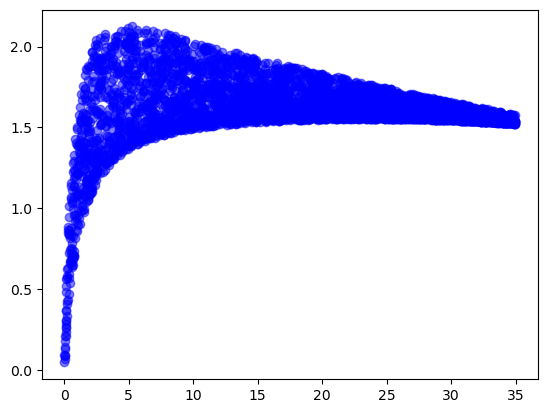

In [64]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(random_results["salinity"], random_results["saturation_aragonite"], color='blue', alpha=0.5)

plt.show()


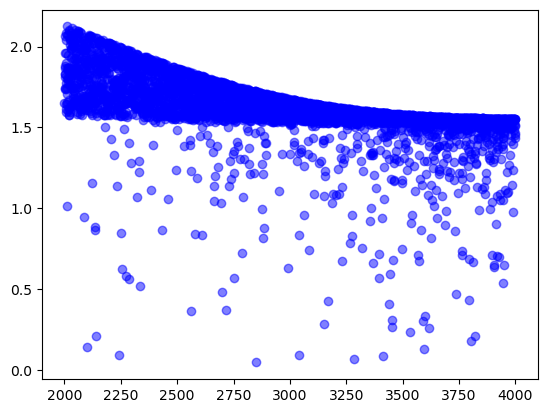

In [65]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(random_results["alkalinity"], random_results["saturation_aragonite"], color='blue', alpha=0.5)

plt.show()

### **Conclusion: the saturation of aragonite is affected by Calcium linear relation with salinity under 10 PSU**


## The implication of Calcium salinity linear relationship over saturation aragonite in Terminos Lagoon

In [82]:
# Copy data to new dataframe
terminos_inorganic_carbon = terminos_ta_dic.copy()

# Create dictionary with data configuration for PyCO2SYS. 
# For more information on the parameters see Humphreys et al (2022)
my_co2sys_params_dic_ta_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": terminos_inorganic_carbon["DIC_micromol_kg"],
    # TA measured in the lab, Total scale
    "par2": terminos_inorganic_carbon["TA_micromol_kg"],
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": terminos_inorganic_carbon["Sal_psu"],  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": terminos_inorganic_carbon["Temp_C"],
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

In [83]:
# Run PyCO2SYS to calculate the carbonate system parameters
terminos_inorganic_carbon_results= pyco2.sys(**my_co2sys_params_dic_ta_config)

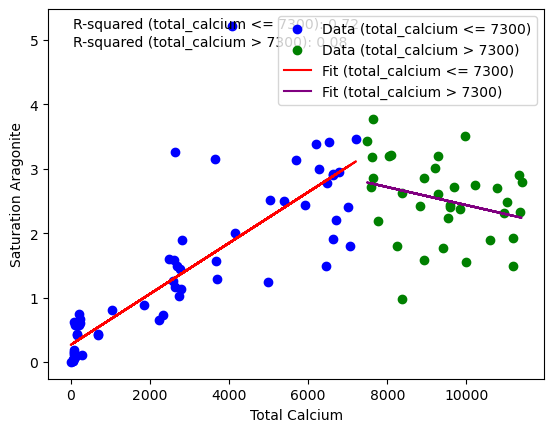

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have two arrays total_calcium and saturation_aragonite
total_calcium = np.array(terminos_inorganic_carbon_results["total_calcium"])
saturation_aragonite = np.array(terminos_inorganic_carbon_results["saturation_aragonite"])

segment_value = 7300

# Segment the data into two sections
mask = total_calcium <= segment_value
total_calcium_1, saturation_aragonite_1 = total_calcium[mask], saturation_aragonite[mask]
total_calcium_2, saturation_aragonite_2 = total_calcium[~mask], saturation_aragonite[~mask]

# Calculate the coefficients of the linear relationship for each section
coefficients_1 = np.polyfit(total_calcium_1, saturation_aragonite_1, 1)
coefficients_2 = np.polyfit(total_calcium_2, saturation_aragonite_2, 1)

# Generate y-values based on the linear relationship for each section
y_values_1 = coefficients_1[0] * total_calcium_1 + coefficients_1[1]
y_values_2 = coefficients_2[0] * total_calcium_2 + coefficients_2[1]

# Calculate the correlation coefficient for each section
r_squared_1 = np.corrcoef(total_calcium_1, saturation_aragonite_1)[0,1]**2
r_squared_2 = np.corrcoef(total_calcium_2, saturation_aragonite_2)[0,1]**2

# Plot the original data as scatter plot
plt.scatter(total_calcium_1, saturation_aragonite_1, color='blue', label= f'Data (total_calcium <= {segment_value})')
plt.scatter(total_calcium_2, saturation_aragonite_2, color='green', label=f'Data (total_calcium > {segment_value})')

# Plot the linear relationships
plt.plot(total_calcium_1, y_values_1, color='red', label=f'Fit (total_calcium <= {segment_value})')
plt.plot(total_calcium_2, y_values_2, color='purple', label=f'Fit (total_calcium > {segment_value})')

# Add the R-squared values to the plot
plt.text(0.05, 0.95, f'R-squared (total_calcium <= {segment_value}): {r_squared_1:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f'R-squared (total_calcium > {segment_value}): {r_squared_2:.2f}', transform=plt.gca().transAxes)

plt.xlabel('Total Calcium')
plt.ylabel('Saturation Aragonite')
plt.legend()
plt.show()

The R-squared value for salinity <= 25 is: 0.7158975909744336
The R-squared value for salinity > 25 is: 0.08018744295291388


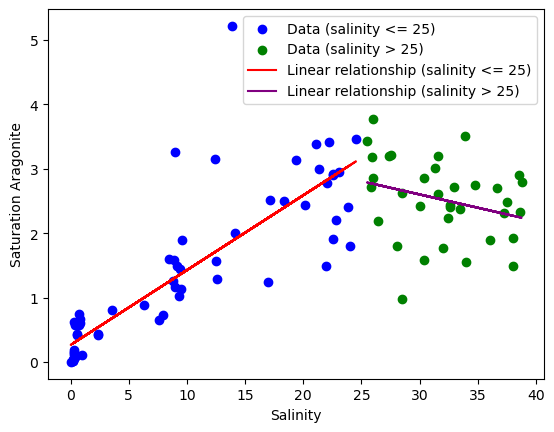

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have two arrays salinity and saturation_aragonite
salinity = np.array(terminos_inorganic_carbon_results["salinity"])
saturation_aragonite = np.array(terminos_inorganic_carbon_results["saturation_aragonite"])

mask_salinty_value = 25

# Segment the data into two sections
mask = salinity <= mask_salinty_value
salinity_1, saturation_aragonite_1 = salinity[mask], saturation_aragonite[mask]
salinity_2, saturation_aragonite_2 = salinity[~mask], saturation_aragonite[~mask]

# Calculate the coefficients of the linear relationship for each section
coefficients_1 = np.polyfit(salinity_1, saturation_aragonite_1, 1)
coefficients_2 = np.polyfit(salinity_2, saturation_aragonite_2, 1)

# Generate y-values based on the linear relationship for each section
y_values_1 = coefficients_1[0] * salinity_1 + coefficients_1[1]
y_values_2 = coefficients_2[0] * salinity_2 + coefficients_2[1]

# Calculate the correlation coefficient for each section
r_squared_1 = np.corrcoef(salinity_1, saturation_aragonite_1)[0,1]**2
r_squared_2 = np.corrcoef(salinity_2, saturation_aragonite_2)[0,1]**2

print(f"The R-squared value for salinity <= {mask_salinty_value} is: {r_squared_1}")
print(f"The R-squared value for salinity > {mask_salinty_value} is: {r_squared_2}")

# Plot the original data as scatter plot
plt.scatter(salinity_1, saturation_aragonite_1, color='blue', label=f"Data (salinity <= {mask_salinty_value})")
plt.scatter(salinity_2, saturation_aragonite_2, color='green', label=f"Data (salinity > {mask_salinty_value})")

# Plot the linear relationships
plt.plot(salinity_1, y_values_1, color='red', label=f"Linear relationship (salinity <= {mask_salinty_value})")
plt.plot(salinity_2, y_values_2, color='purple', label=f"Linear relationship (salinity > {mask_salinty_value})")

plt.xlabel('Salinity')
plt.ylabel('Saturation Aragonite')
plt.legend()
plt.show()

## **Conclusion the saturation of aragonite present a linear relationship with the salinity, the R-squared value for salinity <= 25 is 0.7 and for salinity > 25 is 0.08. We don't recommende the use of omega aragonite in the Terminos Lagoon, because the salinity can be less than 25.**